In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

c:\Users\n07pa\Projects_folder\book_recommendation\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\n07pa\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [11]:
import pandas as pd


In [12]:
df = pd.read_csv(f"{path}/books.csv")

In [13]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [14]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [15]:
df.shape

(6810, 12)

In [16]:
df["subtitle"].isna().sum()

np.int64(4429)

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

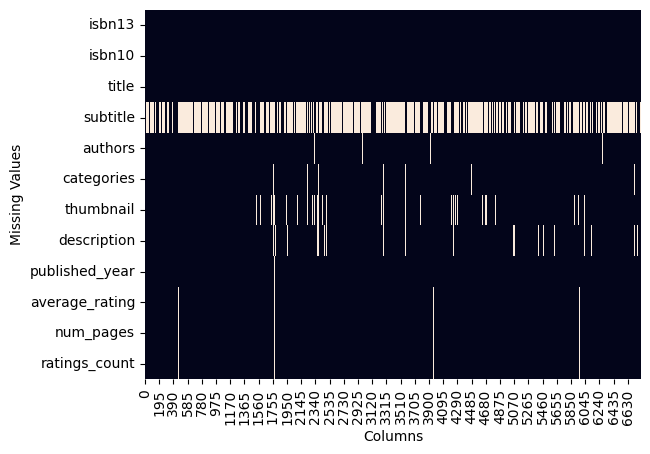

In [18]:
ax= plt.axes()
sb.heatmap(df.isna().transpose(),cbar=False,ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()


In [19]:
import numpy as np
df["description_missing"] = np.where(df["description"].isna(),1,0)
df["age_of_book"] = 2025 - df["published_year"]

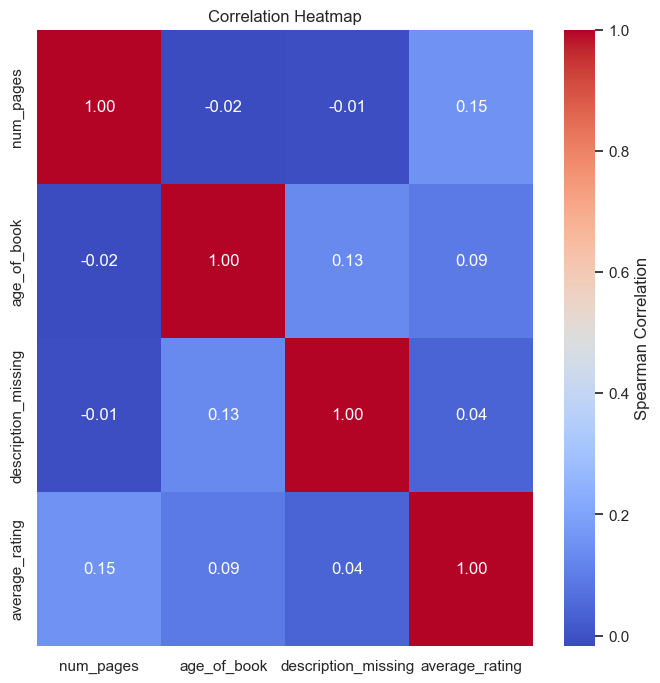

In [20]:
columns_interested = ["num_pages","age_of_book","description_missing", "average_rating"]
corr_matrix = df[columns_interested].corr(method='spearman')

sb.set_theme(style="white")
plt.figure(figsize=(8,8))

heatmap = sb.heatmap(corr_matrix, annot=True,fmt=".2f",cmap="coolwarm",cbar_kws={"label":"Spearman Correlation"})
heatmap.set_title("Correlation Heatmap")

plt.show()

In [21]:
df[(df["description"].isna()) |
    (df["num_pages"].isna()) |
    (df["average_rating"].isna()) |
    (df["published_year"].isna())
    ].shape

(303, 14)

In [22]:
books = df[~(df["description"].isna()) &
    ~(df["num_pages"].isna()) &
    ~(df["average_rating"].isna()) &
    ~(df["published_year"].isna())
    ]

In [23]:
books.shape

(6507, 14)

In [24]:
books["categories"].describe()

count        6474
unique        531
top       Fiction
freq         2523
Name: categories, dtype: object

In [25]:
books["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Courage,1
527,Otherland (Imaginary place),1
528,Animals,1
529,Children of divorced parents,1


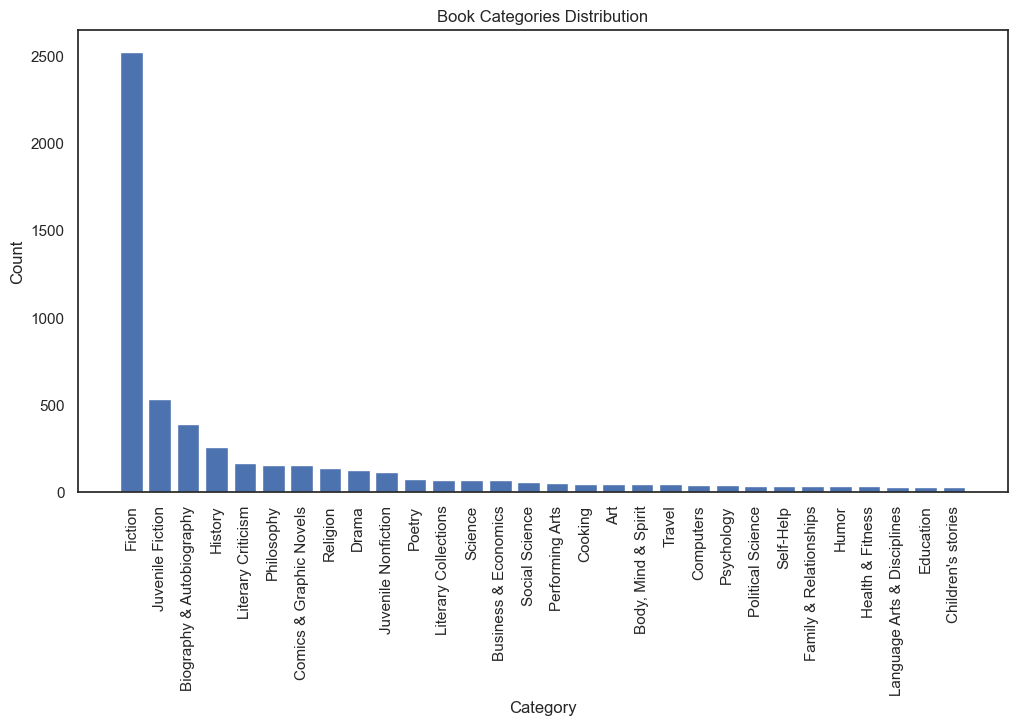

In [26]:

category_counts = books["categories"].value_counts().reset_index()
category_counts.columns = ["category", "count"]
category_counts = category_counts.sort_values("count", ascending=False).head(30)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(category_counts["category"], category_counts["count"])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Book Categories Distribution")
plt.show()


In [27]:
books["description"].head(10)

0    A NOVEL THAT READERS and critics have been eag...
1    A new 'Christie for Christmas' -- a full-lengt...
2    Volume Two of Stephen Donaldson's acclaimed se...
3    A memorable, mesmerizing heroine Jennifer -- b...
4    Lewis' work on the nature of love divides love...
5    "In The Problem of Pain, C.S. Lewis, one of th...
6                                            Donation.
7    Until Vasco da Gama discovered the sea-route t...
8    A new-cover reissue of the fourth book in the ...
9    Kate Blackwell is an enigma and one of the mos...
Name: description, dtype: object

In [28]:
books["words_in_des"] = books["description"].str.split().str.len()

C:\Users\n07pa\AppData\Local\Temp\ipykernel_25104\54204900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books["words_in_des"] = books["description"].str.split().str.len()


In [29]:
books["words_in_des"].describe()

count    6507.000000
mean       66.325803
std        66.120291
min         1.000000
25%        27.000000
50%        40.000000
75%        82.000000
max       920.000000
Name: words_in_des, dtype: float64

In [30]:
books.loc[books["words_in_des"].between(1,4),"description"].head()

6                                 Donation.
11                           Fantasy-roman.
748    Includes bibliographical references.
770                   Bound For Oregon (PB)
775                      No Marketing Blurb
Name: description, dtype: object

In [31]:
books.loc[books["words_in_des"].between(5,14),"description"].head()

2     Volume Two of Stephen Donaldson's acclaimed se...
38    Koko is Peter Straub's foray into the psycholo...
70    A matter of life and death - and the Throne of...
77                       Nonsense rhyming story. 4 yrs+
84    A study guide for the novel There's a Boy in t...
Name: description, dtype: object

In [32]:
books.loc[books["words_in_des"].between(15,24),"description"].head()

10    One of Sidney Sheldon's most popular and bests...
32    Tells the story of three generations of Chines...
36    A magical and fantastic collection of early st...
57    A young drifter finds more than he bargained f...
68    A new 'The Doors of Perception' for the 21st c...
Name: description, dtype: object

In [33]:
books.loc[books["words_in_des"].between(25,34),"description"].head()

9     Kate Blackwell is an enigma and one of the mos...
14    Available in the U.S. for the first time, this...
20    It is 1937, and Charles Ashworth, a Canon to t...
21    Reissue of the author's most famous and well-l...
46    No one believes a little girl when she insists...
Name: description, dtype: object

In [34]:
books_25 = books[books["words_in_des"]>=25]

In [35]:
books_25.shape

(5197, 15)

In [36]:
books_25["title_subtitle"] = (
    np.where(books_25["subtitle"].isna(),books_25["title"],
             books_25[["title","subtitle"]].astype(str).agg(": ".join,axis=1))
)

C:\Users\n07pa\AppData\Local\Temp\ipykernel_25104\2321093371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_25["title_subtitle"] = (


In [37]:
books_25.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,description_missing,age_of_book,words_in_des,title_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain


In [38]:
books_25["words_in_des"].describe()

count    5197.000000
mean       78.774485
std        68.532750
min        25.000000
25%        35.000000
50%        47.000000
75%       105.000000
max       920.000000
Name: words_in_des, dtype: float64

In [45]:
books_25["tag_description"] = (books_25[["isbn13","description"]].astype(str).agg(" ".join,axis=1))

C:\Users\n07pa\AppData\Local\Temp\ipykernel_3260\2890676496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_25["tag_description"] = (books_25[["isbn13","description"]].astype(str).agg(" ".join,axis=1))


In [39]:
books_25.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,description_missing,age_of_book,words_in_des,title_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain


In [40]:
books_25.shape

(5197, 16)

In [ ]:
(
    books_25
    .drop(["subtitle" ,"description_missing" , "age_of_book"  , "words_in_des"], axis=1)
    .to_csv("books_data" , index=False)
)